# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t,ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [21]:
medical.shape

(1338, 8)

In [22]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The distribution is skewed (postively) toward the high end of charges. There are relatively few very high charges and a relatively high number of charges under $10k. The median seems like a more appropriate measure of central tendency for this dataset.

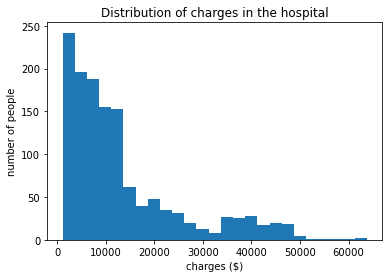

In [23]:
_ = plt.hist(medical.charges, bins=25)
_ = plt.xlabel('charges ($)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of charges in the hospital')

In [24]:
mean_charges = np.mean(medical.charges)
mean_charges

13270.422265141257

In [25]:
std_charges = np.std(medical.charges)
std_charges

12105.484975561605

In [26]:
median_charges = np.median(medical.charges)
median_charges

9382.033

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__The sample size is large, but according to the Central Limit Theorem, as sample sizes increase the distribution of their sample means trends toward a normal distribution. Despite the sample distribution being skewed, we will assume that t-tests are applicable. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ We are interested in a one sided interval since we only care whether the mean is less than 12000. 

In [27]:
charges_cv = t.cdf(12000, df = len(medical)-1, loc = mean_charges, scale = std_charges)
charges_cv

0.45821719822302837

In [28]:
# one-sided 95% confidence interval 
mean_charges-(1.646*(std_charges/np.sqrt(len(medical))))
#we are 95% confident that the true population mean is >= $12725.69

12725.688912051843

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that there is no difference in the average charge to patients with insurance from those without insurance. The alternative hypothesis is that there is a difference in the average charge between these two groups of patients. The pooled t-test requires that the two populations are normally distributed and that the have the same variance. It seems like a stretch to make these assumptions, but according to the Central Limit Theorem it is fair to make them.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [29]:
mean_charges_ins = np.mean(medical.loc[medical['insuranceclaim'] == 1, 'charges'])
mean_charges_ins

16423.928276537663

In [30]:
mean_charges_no_ins = np.mean(medical.loc[medical['insuranceclaim'] == 0, 'charges'])
mean_charges_no_ins

8821.421892306294

In [31]:
#std dev of charges with insurance
std_charges_ins = np.std(medical.loc[medical['insuranceclaim'] == 1, 'charges'])
std_charges_ins

14036.956250260411

In [32]:
#std dev of charges without insurance
std_charges_no_ins = np.std(medical.loc[medical['insuranceclaim'] == 0, 'charges'])
std_charges_no_ins

6440.699841605233

In [33]:
#get size of sample with insurance
n0 = medical['insuranceclaim'].value_counts()[1]
n0

783

In [34]:
#size of sample without iunsurance
n1 = medical['insuranceclaim'].value_counts()[0]
n1

555

In [35]:
#pooled std dev
sp = np.sqrt((((n0-1)*std_charges_ins**2)+((n1-1)*std_charges_no_ins**2))/(n0+n1-2))
sp

11512.282899205744

In [36]:
# manually calculated t-statistic based on pooled std dev
t_ins = (mean_charges_ins - mean_charges_no_ins)/(sp*np.sqrt((1/n0)+(1/n1)))
t_ins
#this gives a very high t statistic

11.901306943555385

In [37]:
# calculate t-statistic and corredponding p-value using scipy.stats.ttest_ind
ttest_ind(medical.loc[medical['insuranceclaim'] == 1, 'charges'], medical.loc[medical['insuranceclaim'] == 0, 'charges'])

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Calculating the t-statistic with scipy.stats.ttest_ind() gives basically the same value for the t-statistic as the one I calculated manually. The p-value is extremely small, indicating I can reject the null hypothesis: there is indeed a difference between the avergae charge for insured vs uninsured patients. Below I plotted both on the same histrogram and visually it seems quite obvious that there is a difference in charges btween the two groups.

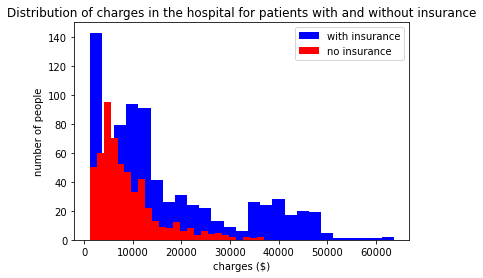

In [38]:
_ = plt.hist(medical.loc[medical['insuranceclaim'] == 1, 'charges'], bins=25, color='blue')
_ = plt.hist(medical.loc[medical['insuranceclaim'] == 0, 'charges'], bins=25, color='red')
_ = plt.xlabel('charges ($)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of charges in the hospital for patients with and without insurance')
_ = plt.legend(['with insurance', 'no insurance'])

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The function for calculating the z score is found in the 'transformations' section instead of under the statistical tests section. I'm not sure why that is other than we need to know the population standard deviation, rather than sample standard deviation, to use the normal distribution in place of the t-distribution.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test